# Table of Contents -
## 1) Import Libraries & Dataset
## 2) Histogram 'order_hour_of_day'
## 3) Bar Chart 'loyalty_flag'
## 4) Sampling & Subsetting
## 5) Exploratory Analysis
## 6) Scatterplot 'age' & 'avg_spending_price'
## 7) Export

# 1) Create a new notebook, import the necessary analysis and visualization libraries, then import your most up-to-date project data (i.e., the data set with your new customer data from the first part of this task).

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Import master dataframe

df=pd.read_pickle('/Users/sjpeterson76/Desktop/CareerFoundry/Data Immersion/Achievement 4/04-25-2021- Instacart Basket Analysis/02 Data/Prepared Data/customers_opm.pkl')

In [3]:
df.head()

,user_id,last_name,gender,state,age,date_joined,n_dependants,fam_status,income,order_id,...,aisle_id,department_id,prices,_merge,max_order,loyalty_flag,avg_spending_price,spending_flag,median_dspo,frequency_flag
0,26711,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2543867,...,77,7,9.0,both,8,New customer,8.205882,Low spender,19.0,Regular customer
1,26711,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,1285508,...,77,7,9.0,both,8,New customer,8.205882,Low spender,19.0,Regular customer
2,26711,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2578584,...,77,7,9.0,both,8,New customer,8.205882,Low spender,19.0,Regular customer
3,26711,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,423547,...,120,16,12.6,both,8,New customer,8.205882,Low spender,19.0,Regular customer
4,26711,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2524893,...,120,16,12.6,both,8,New customer,8.205882,Low spender,19.0,Regular customer


In [4]:
df.shape

(30328763, 30)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30328763 entries, 0 to 30328762
Data columns (total 30 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   user_id                 int64   
 1   last_name               object  
 2   gender                  object  
 3   state                   object  
 4   age                     int64   
 5   date_joined             object  
 6   n_dependants            int64   
 7   fam_status              object  
 8   income                  int64   
 9   order_id                int64   
 10  eval_set                object  
 11  order_number            int64   
 12  orders_day_of_week      int64   
 13  order_hour_of_day       int64   
 14  days_since_prior_order  float64 
 15  product_id              int64   
 16  add_to_cart_order       int64   
 17  reordered               int64   
 18  Unnamed: 0              int64   
 19  product_name            object  
 20  aisle_id                int64   
 21  depart

In [6]:
df.describe()

,user_id,age,n_dependants,income,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,Unnamed: 0,aisle_id,department_id,prices,max_order,avg_spending_price,median_dspo
count,3.032876e+07,3.032876e+07,3.032876e+07,3.032876e+07,3.032876e+07,3.032876e+07,3.032876e+07,3.032876e+07,3.032876e+07,3.032876e+07,3.032876e+07,3.032876e+07,3.032876e+07,3.032876e+07,3.032876e+07,3.032876e+07,3.032876e+07,3.032876e+07,3.032876e+07
mean,1.029339e+05,4.946447e+01,1.501960e+00,9.954015e+04,1.710734e+06,1.824729e+01,2.740832e+00,1.341142e+01,1.110408e+01,2.559649e+04,8.355623e+00,6.299463e-01,2.559820e+04,7.119183e+01,9.922036e+00,1.197725e+01,3.420208e+01,1.197725e+01,1.008815e+01
std,5.946847e+04,1.848533e+01,1.118932e+00,4.310834e+04,9.872433e+05,1.759198e+01,2.087951e+00,4.246834e+00,8.779064e+00,1.408189e+04,7.133935e+00,4.828188e-01,1.408344e+04,3.821413e+01,6.281967e+00,4.963730e+02,2.521129e+01,8.429401e+01,6.885755e+00
min,1.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04,2.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00
25%,5.140900e+04,3.300000e+01,1.000000e+00,6.712900e+04,8.561425e+05,6.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,1.354100e+04,3.000000e+00,0.000000e+00,1.354100e+04,3.100000e+01,4.000000e+00,4.200000e+00,1.400000e+01,7.385366e+00,6.000000e+00
50%,1.025990e+05,4.900000e+01,2.000000e+00,9.666500e+04,1.710898e+06,1.200000e+01,3.000000e+00,1.300000e+01,8.000000e+00,2.527200e+04,6.000000e+00,1.000000e+00,2.527300e+04,8.300000e+01,9.000000e+00,7.400000e+00,2.800000e+01,7.825526e+00,7.000000e+00
75%,1.543850e+05,6.500000e+01,3.000000e+00,1.279650e+05,2.565509e+06,2.500000e+01,5.000000e+00,1.600000e+01,1.500000e+01,3.794700e+04,1.100000e+01,1.000000e+00,3.795100e+04,1.070000e+02,1.600000e+01,1.130000e+01,4.800000e+01,8.257932e+00,1.300000e+01
max,2.062090e+05,8.100000e+01,3.000000e+00,5.939010e+05,3.421083e+06,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,4.968800e+04,1.450000e+02,1.000000e+00,4.969200e+04,1.340000e+02,2.100000e+01,9.999900e+04,9.900000e+01,3.333903e+04,3.000000e+01


# 2) You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.
## - In a markdown cell beneath your histogram, describe what the histogram demonstrates.

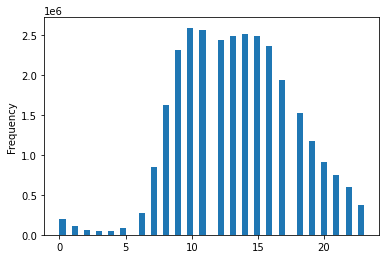

In [7]:
# Create histogram with bins set to 50

hist=df['order_hour_of_day'].plot.hist(bins=50)
hist

## - Orders are submitted mostly 900 hrs (9AM) - 1700 hrs (5PM). Customers rarely order before 7AM, at noon, or at 6PM.

# 3) The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

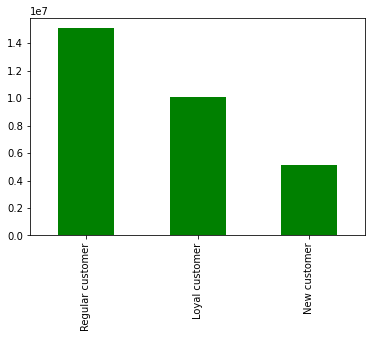

In [8]:
bars=df['loyalty_flag'].value_counts().plot.bar(color=['green'])
bars

# 4) Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [9]:
# Compare 'prices' to 'order_hour_of_day' using a line chart
# Start by creating random samples

np.random.seed(81)
dev=np.random.rand(len(df)) <= 0.7

In [10]:
# Split datframe into 2 samples

big=df[dev]

In [11]:
small=df[~dev]

In [12]:
# Check sizes

len(df)

30328763

In [13]:
len(big)+len(small)

30328763

In [14]:
# Reduce samples to only the columns necessary for chart

df2=small[['prices','order_hour_of_day']]

In [ ]:
# Draw the line chart

line=sns.lineplot(data=df2,x='order_hour_of_day',y='prices')

# 5) Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family status by creating a line chart exploring the connections between age and number of dependents:
## - In a markdown cell beneath your line chart, describe what the line chart shows.

In [ ]:
# Is there any correlaion between age & family status?
# Assign just the necessary columns to 'df3' for exploration

df3=small[['fam_status','income']]

In [ ]:
# Enter the line chart

line2=sns.lineplot(data=df3,x='fam_status',y='income')

### - It appears customers who are 'divorced/widowed' have the most buying power, followed by 'married', then 'single', then 'living with parents and siblings'.

# 6) You’ll also need to explore whether there’s a connection between age and spending power. To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
## - In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

In [ ]:
# What's the correlation between age and 'spending power'?

scatter=sns.scatterplot(x='age',y='avg_spending_price',data=df)
scatter

### - There is not a strong correlation between these variables. Age is no determinant of spending power.

# 7) Export your visualizations as “.png” files in your relevant project folder.

In [ ]:
# Save visuals to:
# /Users/sjpeterson76/Desktop/CareerFoundry/Data Immersion/Achievement 4/04-25-2021- Instacart Basket Analysis/04 Analysis/Visualizations

# Export histogram

hist.figure.savefig('/Users/sjpeterson76/Desktop/CareerFoundry/Data Immersion/Achievement 4/04-25-2021- Instacart Basket Analysis/04 Analysis/Visualizations/task_4.9_histogram.png')

In [ ]:
# Export bar chart

bars.figure.savefig('/Users/sjpeterson76/Desktop/CareerFoundry/Data Immersion/Achievement 4/04-25-2021- Instacart Basket Analysis/04 Analysis/Visualizations/task_4.9_bars.png')

In [ ]:
# Export line chart 1

line.figure.savefig('/Users/sjpeterson76/Desktop/CareerFoundry/Data Immersion/Achievement 4/04-25-2021- Instacart Basket Analysis/04 Analysis/Visualizations/task_4.9_line1.png')

In [ ]:
# Export line chart 2

line2.figure.savefig('/Users/sjpeterson76/Desktop/CareerFoundry/Data Immersion/Achievement 4/04-25-2021- Instacart Basket Analysis/04 Analysis/Visualizations/task_4.9_line2.png')

In [ ]:
# Export scaterplot

scatter.figure.savefig('/Users/sjpeterson76/Desktop/CareerFoundry/Data Immersion/Achievement 4/04-25-2021- Instacart Basket Analysis/04 Analysis/Visualizations/task_4.9_scatterplot.png')